In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("crop_recommendation.csv")  # Ensure dataset has the required features

# Selecting required features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']  # Assuming 'label' is the crop name
# Encode crop names to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 99.32%


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("crop_recommendation.csv")  # Ensure dataset has the required features

# Selecting required features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']  # Assuming 'label' is the crop name

# Encode crop names to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 94.77%


C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load dataset
data = pd.read_csv("crop_recommendation.csv")  # Ensure the dataset has relevant features

# Selecting features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = data['label']  # Target variable (Crop label)

# Encode categorical crop names into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the input features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize Logistic Regression Model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# **Hyperparameter Tuning using Grid Search**
param_grid = {'C': [0.1, 1, 10, 50, 100], 'tol': [1e-4, 1e-3, 1e-2]}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make Predictions
y_pred = best_model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# **Function for Crop Recommendation**
def recommend_crop(n, p, k, temp, humidity, ph, rainfall):
    # Prepare input as a numpy array
    input_data = np.array([[n, p, k, temp, humidity, ph, rainfall]])
    input_scaled = scaler.transform(input_data)  # Scale the input
    prediction = best_model.predict(input_scaled)  # Make prediction
    crop_name = label_encoder.inverse_transform(prediction)  # Convert to actual crop name
    return crop_name[0]

# Example Usage
print("Recommended Crop:", recommend_crop(90, 42, 43, 20.8, 82.3, 6.4, 202.2))


C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_mo

Optimized Model Accuracy: 97.05%
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00 

C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_mo

C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5

Epoch 1/10 - Training Loss: 2.6247 - Training Accuracy: 0.6614 - Validation Loss: 2.6428 - Validation Accuracy: 0.6227
Epoch 2/10 - Training Loss: 2.2428 - Training Accuracy: 0.6653 - Validation Loss: 2.2720 - Validation Accuracy: 0.6250
Epoch 3/10 - Training Loss: 1.9297 - Training Accuracy: 0.7210 - Validation Loss: 1.9651 - Validation Accuracy: 0.6886
Epoch 4/10 - Training Loss: 1.6702 - Training Accuracy: 0.7364 - Validation Loss: 1.7141 - Validation Accuracy: 0.6932
Epoch 5/10 - Training Loss: 1.4540 - Training Accuracy: 0.7688 - Validation Loss: 1.5030 - Validation Accuracy: 0.7205
Epoch 6/10 - Training Loss: 1.2738 - Training Accuracy: 0.7778 - Validation Loss: 1.3304 - Validation Accuracy: 0.7341
Epoch 7/10 - Training Loss: 1.1289 - Training Accuracy: 0.7875 - Validation Loss: 1.1776 - Validation Accuracy: 0.7750
Epoch 8/10 - Training Loss: 1.0656 - Training Accuracy: 0.8040 - Validation Loss: 1.1450 - Validation Accuracy: 0.7750
Epoch 9/10 - Training Loss: 1.0211 - Training Ac

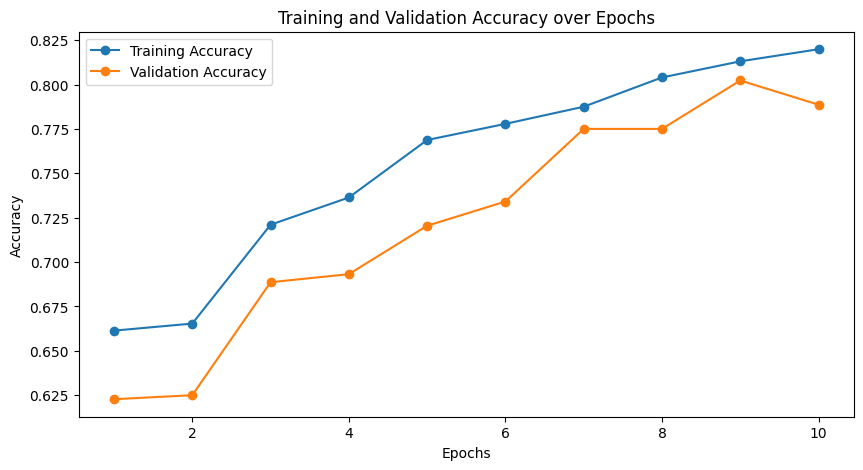

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Load dataset
data = pd.read_csv("crop_recommendation.csv")  # Ensure dataset has the required features

# Selecting required features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']  # Assuming 'label' is the crop name

# Encode crop names to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1, solver='lbfgs', multi_class='multinomial', warm_start=True)

epochs = 10  # Number of simulated training epochs
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

for epoch in range(epochs):
    log_reg.fit(X_train, y_train)  # Fit model incrementally
    
    # Predictions
    y_train_pred_proba = log_reg.predict_proba(X_train)
    y_train_pred = log_reg.predict(X_train)
    y_test_pred_proba = log_reg.predict_proba(X_test)
    y_test_pred = log_reg.predict(X_test)
    
    # Compute loss and accuracy
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_acc = accuracy_score(y_train, y_train_pred)
    val_loss = log_loss(y_test, y_test_pred_proba)
    val_acc = accuracy_score(y_test, y_test_pred)
    
    # Store values
    training_loss.append(train_loss)
    training_accuracy.append(train_acc)
    validation_loss.append(val_loss)
    validation_accuracy.append(val_acc)
    
    print(f"Epoch {epoch+1}/{epochs} - Training Loss: {train_loss:.4f} - Training Accuracy: {train_acc:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_acc:.4f}")

# Plot Training & Validation Loss
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), training_loss, label="Training Loss", marker="o")
plt.plot(range(1, epochs+1), validation_loss, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), training_accuracy, label="Training Accuracy", marker="o")
plt.plot(range(1, epochs+1), validation_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy over Epochs")
plt.show()


Epoch 1/10


C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2954 - loss: 2.8540 - val_accuracy: 0.6114 - val_loss: 1.9619
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 1.5947 - val_accuracy: 0.7682 - val_loss: 0.8974
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.7629 - val_accuracy: 0.8500 - val_loss: 0.5256
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8946 - loss: 0.4755 - val_accuracy: 0.9000 - val_loss: 0.3727
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.3365 - val_accuracy: 0.9250 - val_loss: 0.2899
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9504 - loss: 0.2445 - val_accuracy: 0.9159 - val_loss: 0.2564
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9416 - loss: 0.2123 - val_accuracy: 0.9386 - val_loss: 0.2165
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1750 - val_accuracy: 0.9477 - val_

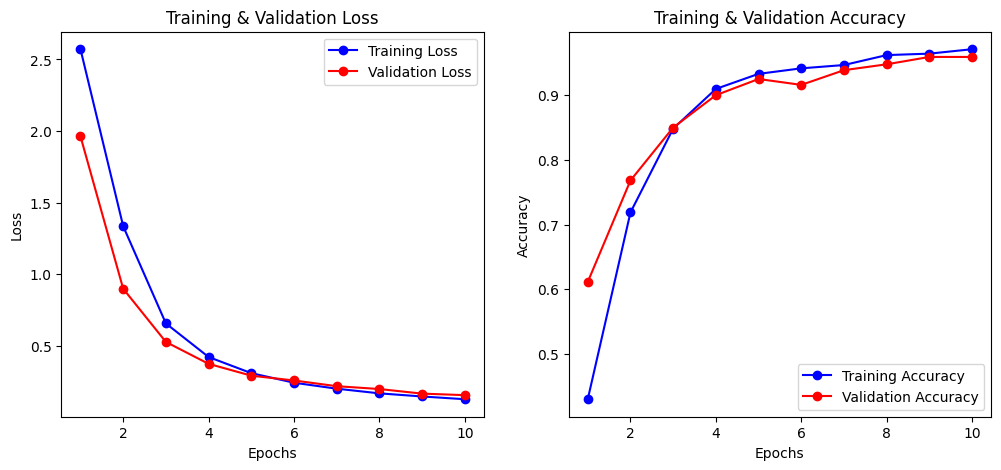

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
data = pd.read_csv("crop_recommendation.csv")  

# Selecting required features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode crop names to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16, verbose=1)

# Plot training & validation loss and accuracy
epochs = range(1, 11)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [1]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Selecting features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode crop names to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

def recommend_crop():
    try:
        N = float(n_entry.get())
        P = float(p_entry.get())
        K = float(k_entry.get())
        temp = float(temp_entry.get())
        humidity = float(humidity_entry.get())
        ph = float(ph_entry.get())
        rainfall = float(rainfall_entry.get())

        input_data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
        prediction = rf_model.predict(input_data)
        crop_name = le.inverse_transform(prediction)[0]
        messagebox.showinfo("Crop Recommendation", f"Recommended Crop: {crop_name}")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values")

# Create GUI
root = tk.Tk()
root.title("Crop Recommendation System")
root.geometry("400x400")

tk.Label(root, text="Enter Soil and Climate Details").pack()

fields = ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall']
entries = []
for field in fields:
    frame = tk.Frame(root)
    frame.pack(pady=5)
    tk.Label(frame, text=field + ":").pack(side=tk.LEFT)
    entry = tk.Entry(frame)
    entry.pack(side=tk.RIGHT)
    entries.append(entry)

n_entry, p_entry, k_entry, temp_entry, humidity_entry, ph_entry, rainfall_entry = entries

submit_btn = tk.Button(root, text="Recommend Crop", command=recommend_crop)
submit_btn.pack(pady=20)

root.mainloop()


C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


In [2]:
# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Feature selection
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Random Forest (with replacement)
rf_with = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf_with.fit(X_train_scaled, y_train)
rf_with_acc = accuracy_score(y_test, rf_with.predict(X_test_scaled))

# Random Forest (without replacement)
rf_without = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_without.fit(X_train_scaled, y_train)
rf_without_acc = accuracy_score(y_test, rf_without.predict(X_test_scaled))

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)
dtree_acc = accuracy_score(y_test, dtree.predict(X_test_scaled))


C:\Users\91872\AppData\Local\Temp\ipykernel_14588\2767470879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[0], x=acc_labels, y=acc_values, palette='viridis')
C:\Users\91872\AppData\Local\Temp\ipykernel_14588\2767470879.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(acc_labels, rotation=30, ha='right')
C:\Users\91872\AppData\Local\Temp\ipykernel_14588\2767470879.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axs[1], y=acc_labels, x=acc_values, palette='magma')
C:\Users\91872\AppData\Local\Temp\ipykernel_14588\2767470879.py:25: UserWarning: Glyph 127806 (\N{E

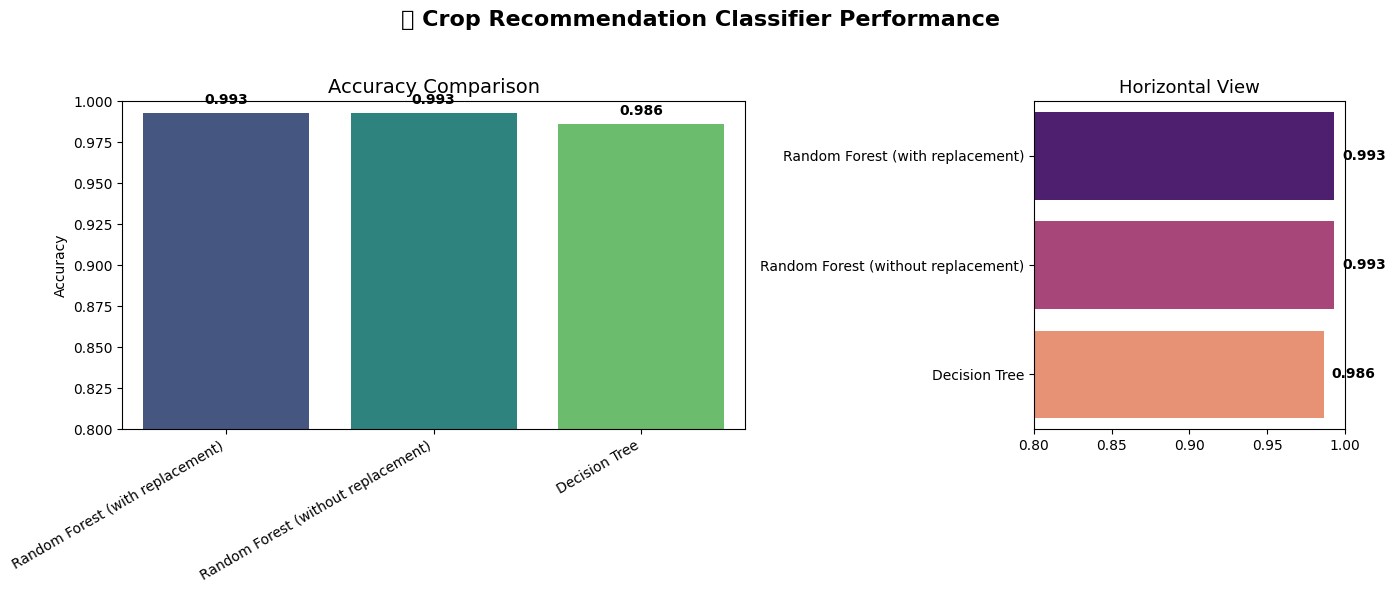

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})
fig.suptitle('🌾 Crop Recommendation Classifier Performance', fontsize=16, fontweight='bold')

# Main accuracy bar plot
sns.barplot(ax=axs[0], x=acc_labels, y=acc_values, palette='viridis')

axs[0].set_title('Accuracy Comparison', fontsize=14)
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0.8, 1.0)
axs[0].set_xticklabels(acc_labels, rotation=30, ha='right')

# Annotate accuracy values on top of bars
for i, v in enumerate(acc_values):
    axs[0].text(i, v + 0.005, f"{v:.3f}", color='black', ha='center', fontweight='bold')

# Secondary mini chart (e.g., horizontal bar)
sns.barplot(ax=axs[1], y=acc_labels, x=acc_values, palette='magma')
axs[1].set_title('Horizontal View', fontsize=13)
axs[1].set_xlim(0.8, 1.0)

# Add accuracy values
for i, v in enumerate(acc_values):
    axs[1].text(v + 0.005, i, f"{v:.3f}", color='black', va='center', fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\91872\AppData\Local\Temp\ipykernel_14588\893423521.py:23: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()


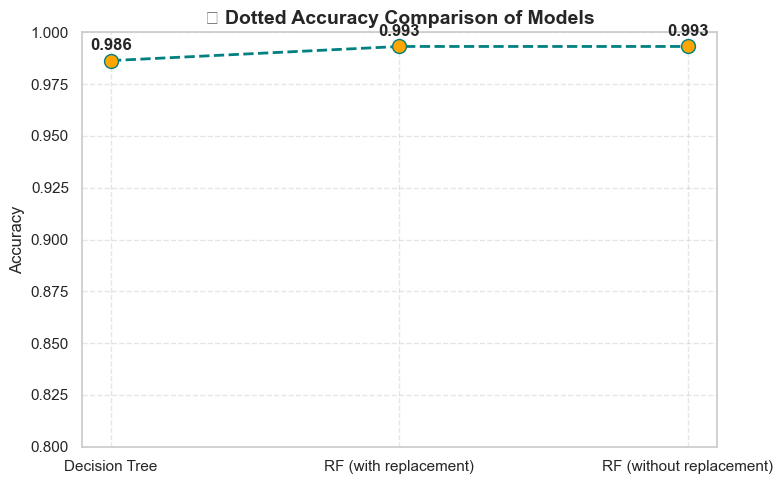

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
acc_labels = ['Decision Tree', 'RF (with replacement)', 'RF (without replacement)']
acc_values = [dtree_acc, rf_with_acc, rf_without_acc]

# Plot
plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')

# Dotted line plot
plt.plot(acc_labels, acc_values, 'o--', color='teal', linewidth=2, markersize=10, markerfacecolor='orange')

# Annotate
for i, acc in enumerate(acc_values):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', fontsize=12, fontweight='bold')

plt.title('🌾 Dotted Accuracy Comparison of Models', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🌾 Model Accuracies:
✅ Decision Tree Accuracy                : 0.9864
✅ Random Forest (with replacement)      : 0.9932
✅ Random Forest (without replacement)   : 0.9932


C:\Users\91872\AppData\Local\Temp\ipykernel_14588\726333676.py:70: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


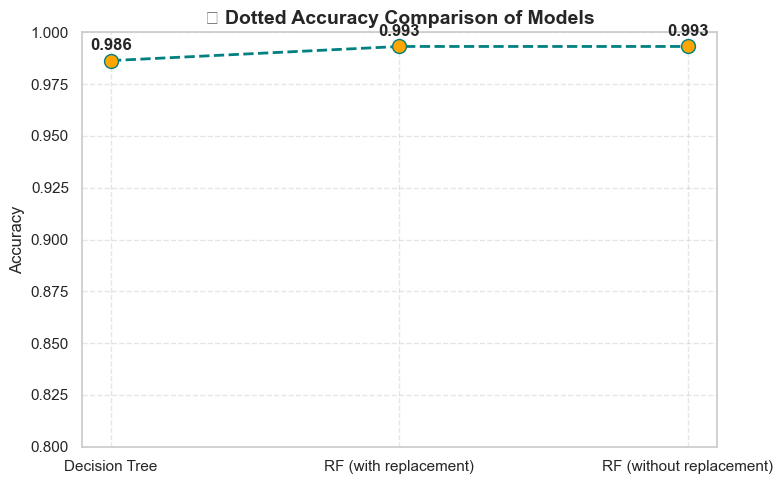

C:\Users\91872\AppData\Local\Temp\ipykernel_14588\726333676.py:110: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


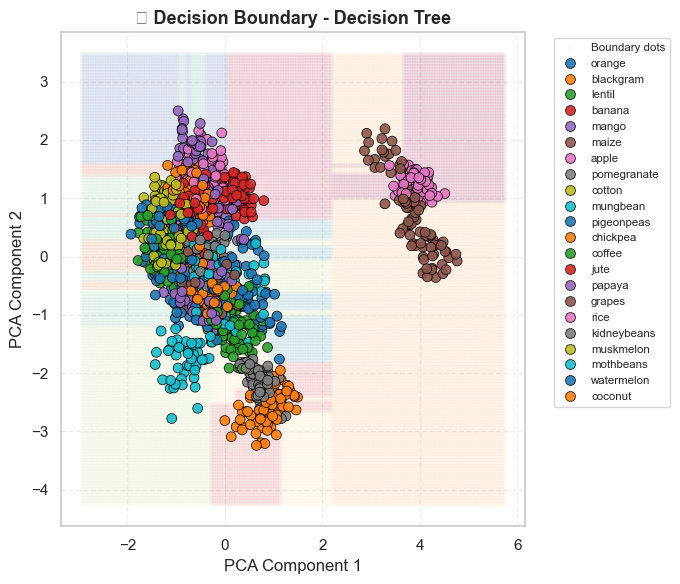

C:\Users\91872\AppData\Local\Temp\ipykernel_14588\726333676.py:110: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


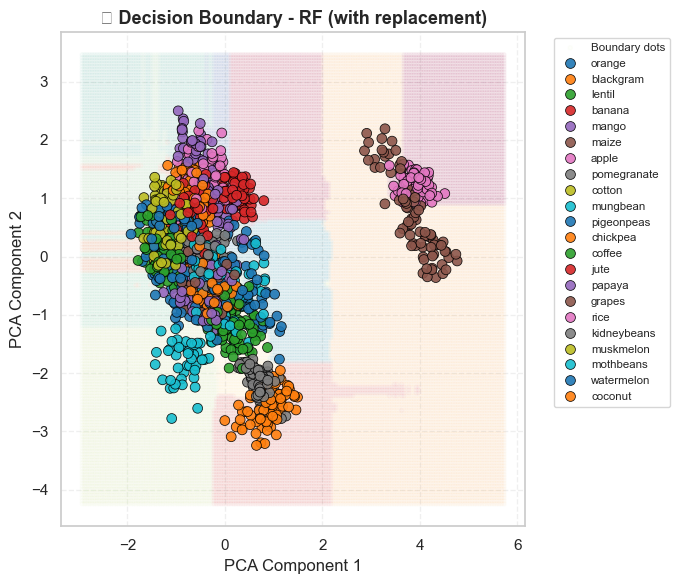

C:\Users\91872\AppData\Local\Temp\ipykernel_14588\726333676.py:110: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


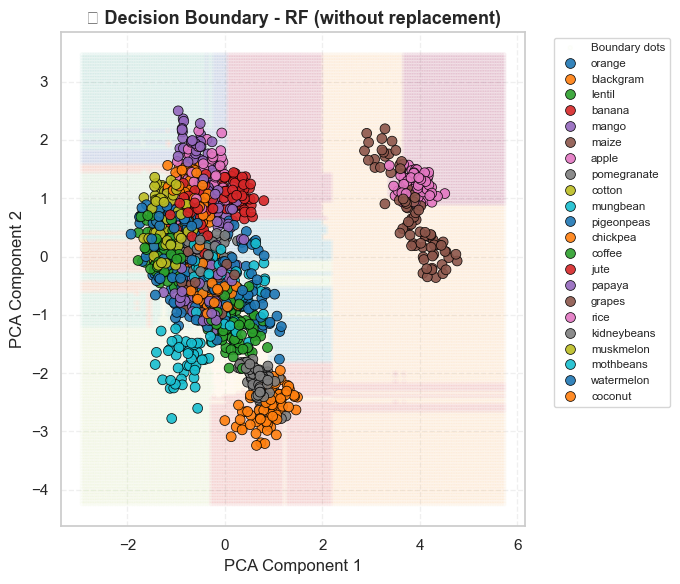

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)
y_pred_dt = dtree.predict(X_test_scaled)
dtree_acc = accuracy_score(y_test, y_pred_dt)

# Random Forest with replacement (bootstrap=True)
rf_with = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf_with.fit(X_train_scaled, y_train)
y_pred_rf_with = rf_with.predict(X_test_scaled)
rf_with_acc = accuracy_score(y_test, y_pred_rf_with)

# Random Forest without replacement (bootstrap=False)
rf_without = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_without.fit(X_train_scaled, y_train)
y_pred_rf_without = rf_without.predict(X_test_scaled)
rf_without_acc = accuracy_score(y_test, y_pred_rf_without)

# Print accuracies
print("🌾 Model Accuracies:")
print(f"✅ Decision Tree Accuracy                : {dtree_acc:.4f}")
print(f"✅ Random Forest (with replacement)      : {rf_with_acc:.4f}")
print(f"✅ Random Forest (without replacement)   : {rf_without_acc:.4f}")

# --- Dotted Accuracy Plot ---
acc_labels = ['Decision Tree', 'RF (with replacement)', 'RF (without replacement)']
acc_values = [dtree_acc, rf_with_acc, rf_without_acc]

plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')
plt.plot(acc_labels, acc_values, 'o--', color='teal', linewidth=2, markersize=10, markerfacecolor='orange')

for i, acc in enumerate(acc_values):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', fontsize=12, fontweight='bold')

plt.title('🌾 Dotted Accuracy Comparison of Models', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Decision Boundary (Dot Form via PCA) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

h = 0.05
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Train models on PCA-transformed data
dt_pca = DecisionTreeClassifier(random_state=42).fit(X_pca, y_train)
rf_pca_with = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42).fit(X_pca, y_train)
rf_pca_without = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42).fit(X_pca, y_train)

models = {
    "Decision Tree": dt_pca,
    "RF (with replacement)": rf_pca_with,
    "RF (without replacement)": rf_pca_without
}

colors = ['#FF6F61', '#6B5B95', '#88B04B']

for i, (name, model) in enumerate(models.items()):
    preds = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.scatter(xx, yy, c=preds, cmap='Spectral', alpha=0.04, marker='.', label='Boundary dots')
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y_train),
                    palette='tab10', edgecolor='black', s=50, alpha=0.9)

    plt.title(f'🌾 Decision Boundary - {name}', fontsize=13, fontweight='bold')
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


C:\Users\91872\AppData\Local\Temp\ipykernel_14588\3044218736.py:17: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


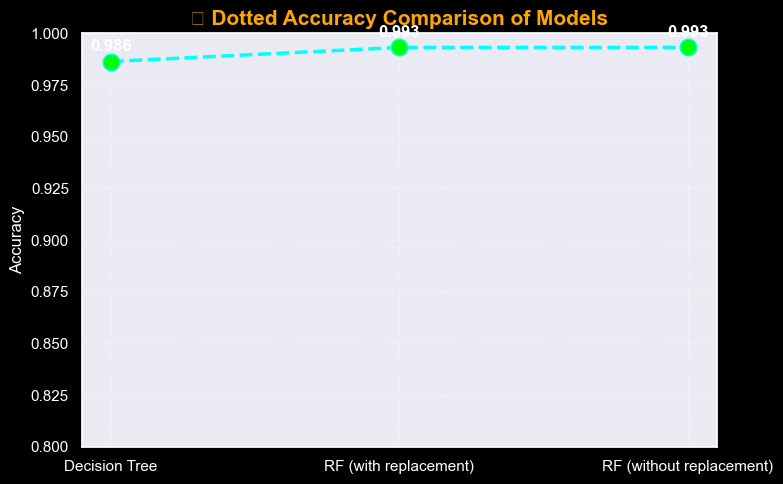

In [10]:
# --- Dotted Accuracy Plot (Black Background) ---
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
sns.set(style='dark')

plt.plot(acc_labels, acc_values, 'o--', color='cyan', linewidth=2.5, markersize=12, markerfacecolor='lime')

for i, acc in enumerate(acc_values):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', fontsize=12, fontweight='bold', color='white')

plt.title('🌾 Dotted Accuracy Comparison of Models', fontsize=15, fontweight='bold', color='orange')
plt.ylabel('Accuracy', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.ylim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\91872\AppData\Local\Temp\ipykernel_14588\3468752172.py:18: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


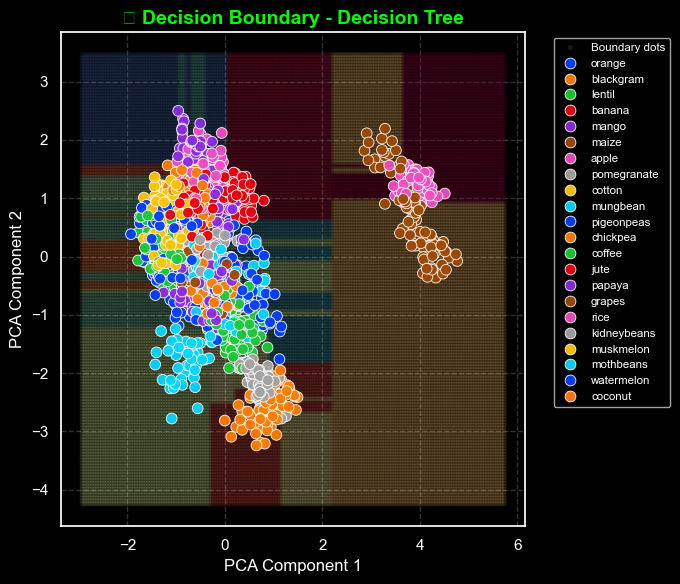

C:\Users\91872\AppData\Local\Temp\ipykernel_14588\3468752172.py:18: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


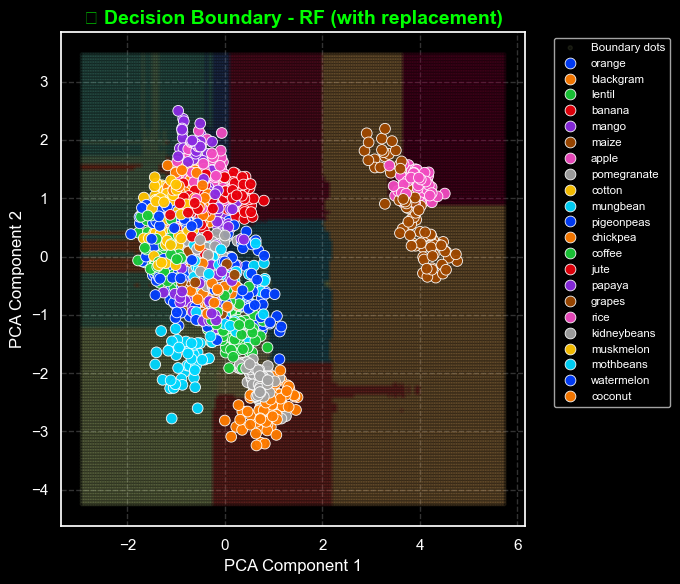

C:\Users\91872\AppData\Local\Temp\ipykernel_14588\3468752172.py:18: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


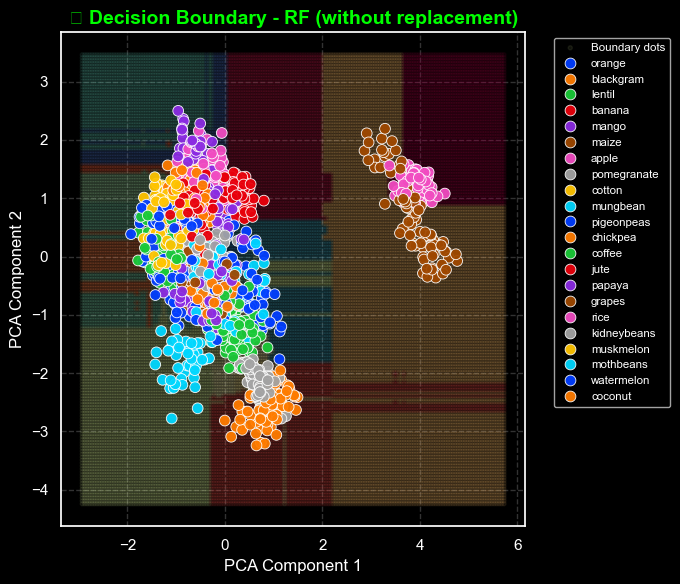

In [11]:
for i, (name, model) in enumerate(models.items()):
    preds = model.predict(grid).reshape(xx.shape)

    plt.style.use('dark_background')
    plt.figure(figsize=(7, 6))
    plt.scatter(xx, yy, c=preds, cmap='Spectral', alpha=0.08, marker='.', label='Boundary dots')
    
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y_train),
                    palette='bright', edgecolor='white', s=60, alpha=0.95)

    plt.title(f'🌌 Decision Boundary - {name}', fontsize=14, fontweight='bold', color='lime')
    plt.xlabel("PCA Component 1", color='white')
    plt.ylabel("PCA Component 2", color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='x-small')
    plt.tight_layout()
    plt.show()


C:\Users\91872\AppData\Local\Temp\ipykernel_14588\1533043119.py:12: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


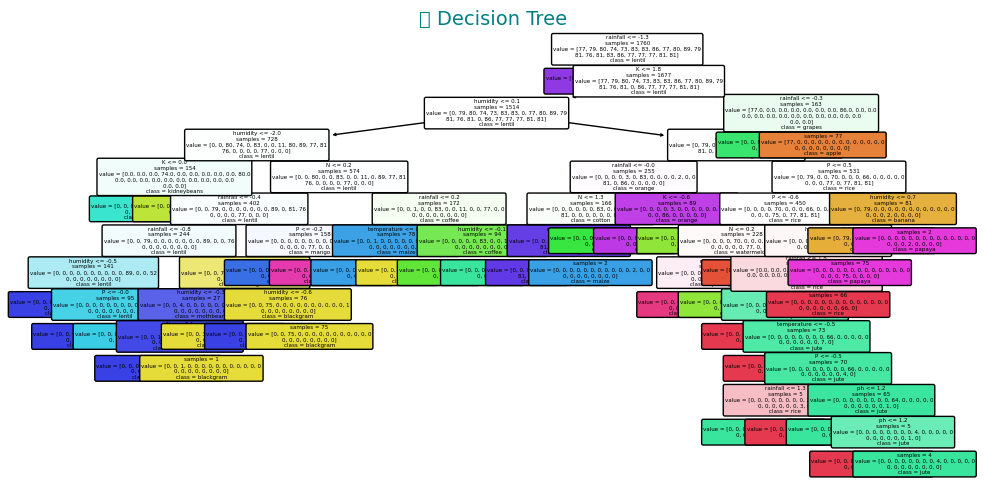

In [21]:
plt.style.use('default')  # Ensures white background
plt.figure(figsize=(10, 5))  # Compact size
plot_tree(dtree,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=4,
          impurity=False,
          precision=1)
plt.title("🌿 Decision Tree", fontsize=14, color='teal')  # Light title color
plt.tight_layout()
plt.show()



C:\Users\91872\AppData\Local\Temp\ipykernel_14588\1048926216.py:12: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


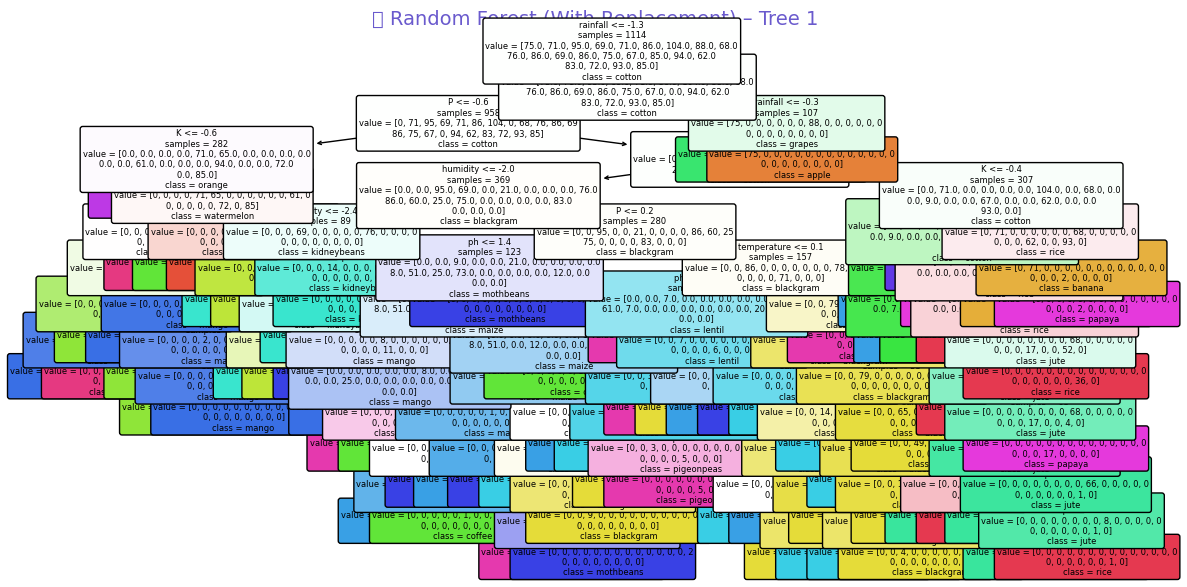

In [22]:
plt.style.use('default')  # Ensures white background
plt.figure(figsize=(12, 6))
plot_tree(rf_with.estimators_[0],
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=6,
          impurity=False,
          precision=1)
plt.title("🌲 Random Forest (With Replacement) – Tree 1", fontsize=14, color='slateblue')
plt.tight_layout()
plt.show()


C:\Users\91872\AppData\Local\Temp\ipykernel_14588\1048926216.py:12: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


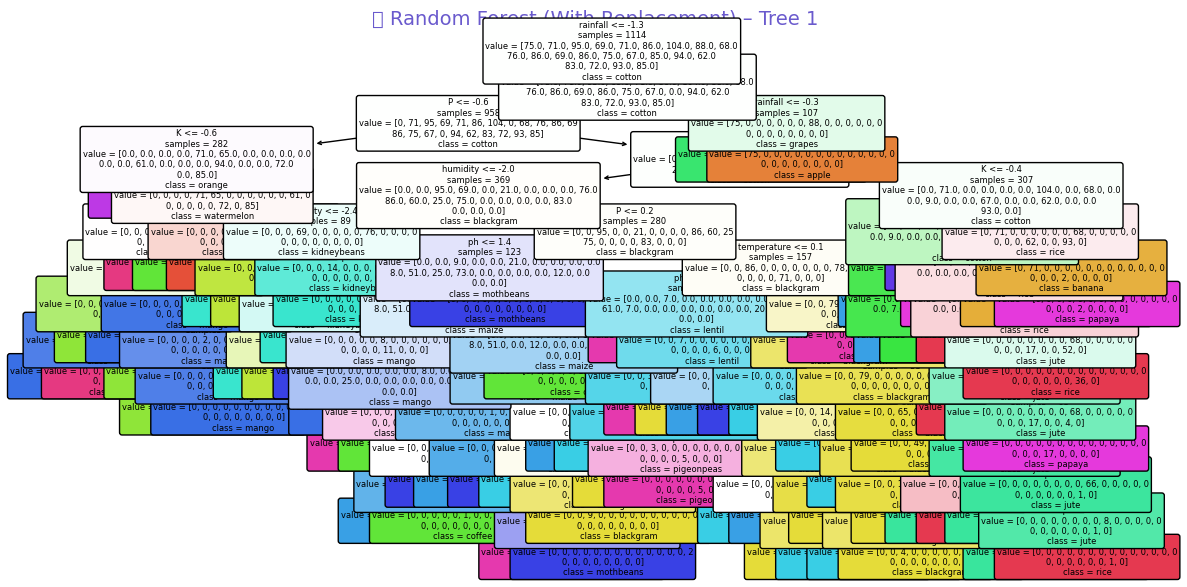

In [23]:
plt.style.use('default')  # Ensures white background
plt.figure(figsize=(12, 6))
plot_tree(rf_with.estimators_[0],
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=6,
          impurity=False,
          precision=1)
plt.title("🌲 Random Forest (With Replacement) – Tree 1", fontsize=14, color='slateblue')
plt.tight_layout()
plt.show()


Accuracy: 99.32%

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0

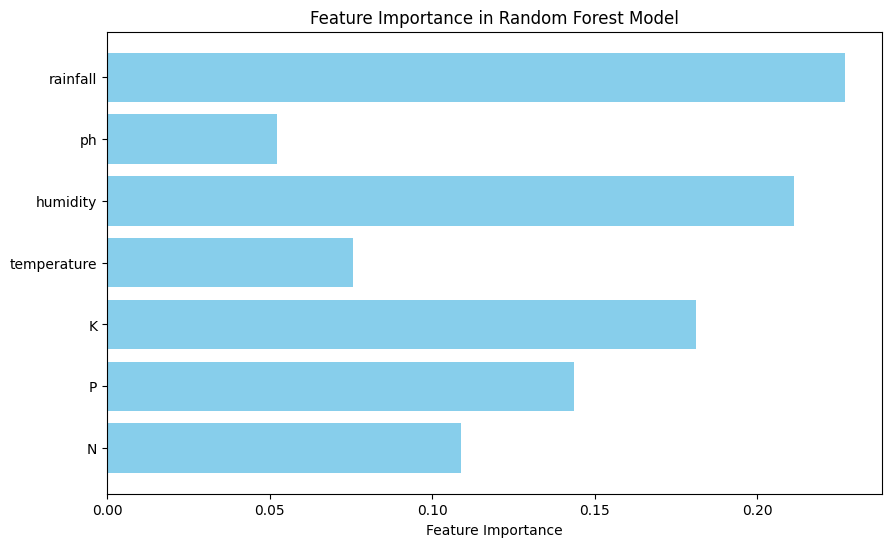

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Selecting required features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode crop names to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot feature importances (optional)
features = X.columns
importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


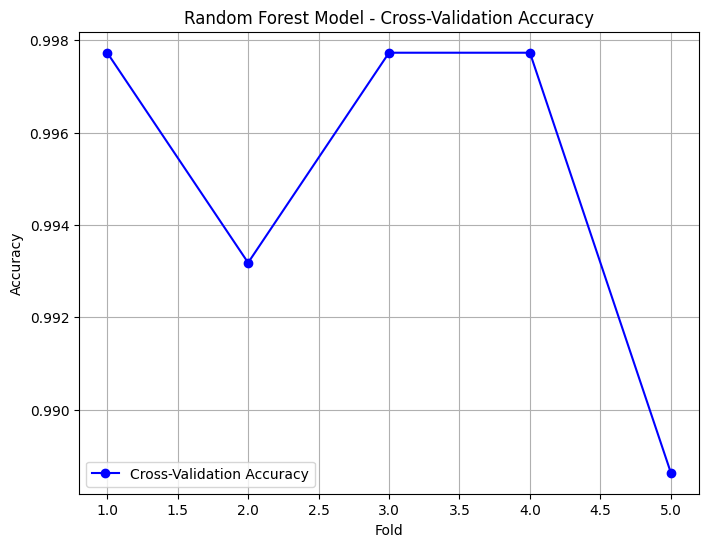

Mean Accuracy: 99.50%
Standard Deviation: 0.36%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Selecting required features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode crop names to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation (5 folds) to get accuracy scores
cv_scores = cross_val_score(rf_model, X_scaled, y_encoded, cv=5, scoring='accuracy')

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b', label='Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Random Forest Model - Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


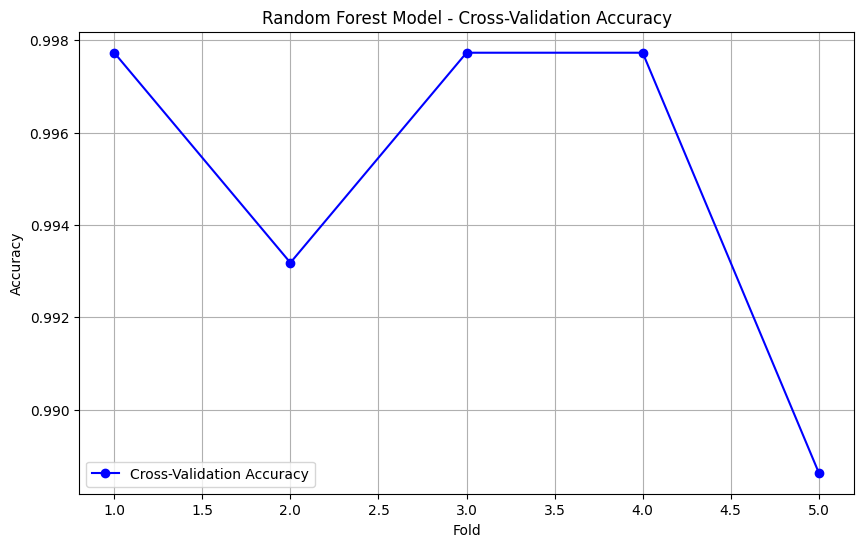

Mean Accuracy: 99.50%
Standard Deviation: 0.36%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Selecting required features and target
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode crop names to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation (5 folds) to get accuracy scores
cv_scores = cross_val_score(rf_model, X_scaled, y_encoded, cv=5, scoring='accuracy')

# Plotting the accuracy like an exponential line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b', label='Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Random Forest Model - Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv("crop_recommendation.csv")
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = LabelEncoder().fit_transform(data['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


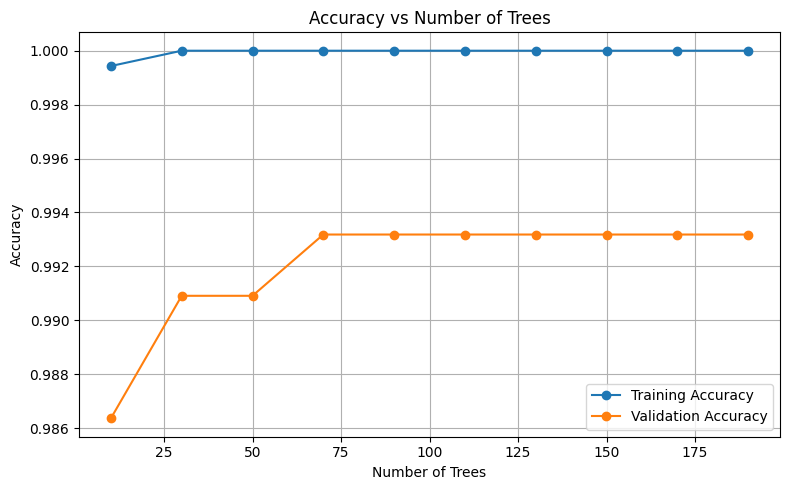

In [6]:
tree_counts = list(range(10, 201, 20))
train_accuracies = []
test_accuracies = []

for n in tree_counts:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(8, 5))
plt.plot(tree_counts, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_counts, test_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import ShuffleSplit

train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
depths = range(1, 21)
train_scores, val_scores = validation_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X, y, param_name='max_depth', param_range=depths,
    cv=5, scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(depths, train_scores_mean, label='Training Accuracy', marker='o')
plt.plot(depths, val_scores_mean, label='Validation Accuracy', marker='o')
plt.title('Validation Curve for max_depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("crop_recommendation.csv")
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = LabelEncoder().fit_transform(data['label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of max_depth values to test
depth_range = range(1, 21)

# Generate validation curve
train_scores, val_scores = validation_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train, y_train,
    param_name='max_depth',
    param_range=depth_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_mean, label='Training Accuracy', color='red', marker='o')
plt.plot(depth_range, val_mean, label='Validation Accuracy', color='blue', marker='o')
plt.title('Effect of max_depth on Model Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\91872\AppData\Local\Temp\ipykernel_9976\441775353.py:43: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


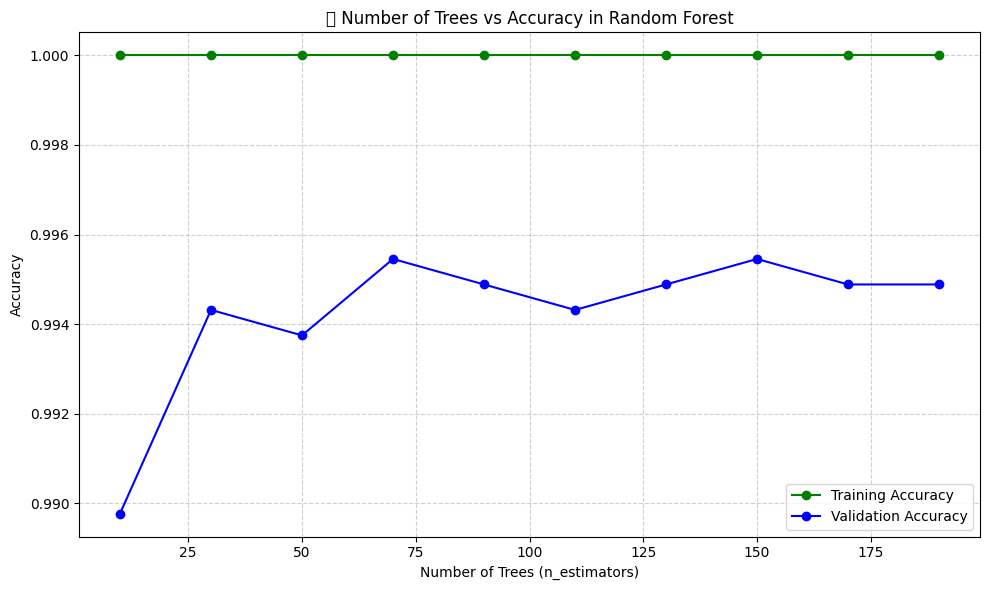

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("crop_recommendation.csv")
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = LabelEncoder().fit_transform(data['label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define range of number of trees to evaluate
n_estimators_range = range(10, 210, 20)  # from 10 to 200 in steps of 20

# Validation curve for n_estimators
train_scores, val_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='n_estimators',
    param_range=n_estimators_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Compute mean scores
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_mean, label='Training Accuracy', color='green', marker='o')
plt.plot(n_estimators_range, val_mean, label='Validation Accuracy', color='blue', marker='o')
plt.title('🌲 Number of Trees vs Accuracy in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


🌾 Model Accuracies:
✅ Decision Tree Accuracy                : 0.9864
✅ Random Forest (with replacement)      : 0.9932
✅ Random Forest (without replacement)   : 0.9932


C:\Users\91872\AppData\Local\Temp\ipykernel_9064\3238787930.py:73: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


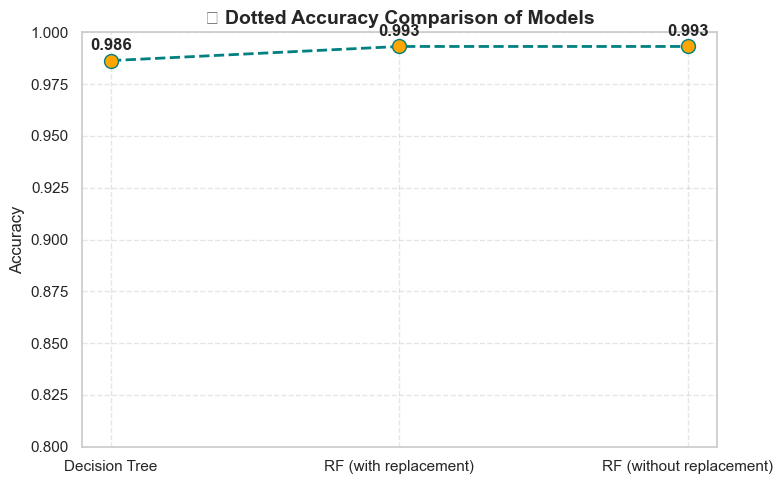

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# %matplotlib inline  # Uncomment this only if using Jupyter Notebook

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)
y_pred_dt = dtree.predict(X_test_scaled)
dtree_acc = accuracy_score(y_test, y_pred_dt)

# Train Random Forest (with replacement)
rf_with = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf_with.fit(X_train_scaled, y_train)
y_pred_rf_with = rf_with.predict(X_test_scaled)
rf_with_acc = accuracy_score(y_test, y_pred_rf_with)

# Train Random Forest (without replacement)
rf_without = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_without.fit(X_train_scaled, y_train)
y_pred_rf_without = rf_without.predict(X_test_scaled)
rf_without_acc = accuracy_score(y_test, y_pred_rf_without)

# Print accuracy results
print("🌾 Model Accuracies:")
print(f"✅ Decision Tree Accuracy                : {dtree_acc:.4f}")
print(f"✅ Random Forest (with replacement)      : {rf_with_acc:.4f}")
print(f"✅ Random Forest (without replacement)   : {rf_without_acc:.4f}")

# -------- Plot Accuracy Comparison --------
acc_labels = ['Decision Tree', 'RF (with replacement)', 'RF (without replacement)']
acc_values = [dtree_acc, rf_with_acc, rf_without_acc]

plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')
plt.plot(acc_labels, acc_values, 'o--', color='teal', linewidth=2, markersize=10, markerfacecolor='orange')

for i, acc in enumerate(acc_values):
    plt.text(i, acc + 0.005, f'{acc:.3f}', ha='center', fontsize=12, fontweight='bold')

plt.title('🌾 Dotted Accuracy Comparison of Models', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


🌾 Model Accuracies:
✅ Decision Tree Accuracy                : 0.9864
✅ Random Forest (with replacement)      : 0.9932
✅ Random Forest (without replacement)   : 0.9932


C:\Users\91872\AppData\Local\Temp\ipykernel_9064\2027411972.py:76: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


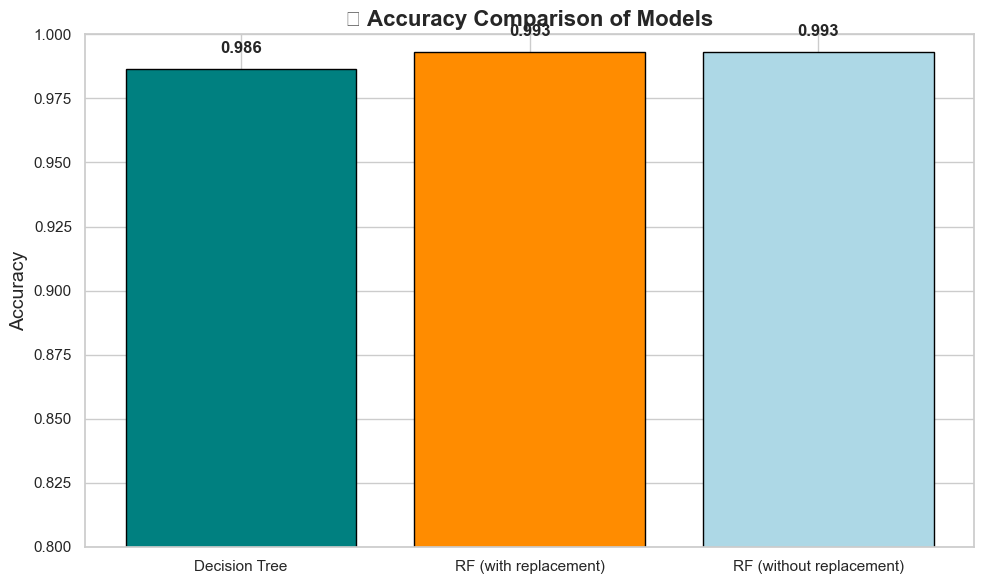

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)
y_pred_dt = dtree.predict(X_test_scaled)
dtree_acc = accuracy_score(y_test, y_pred_dt)

# Train Random Forest (with replacement)
rf_with = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf_with.fit(X_train_scaled, y_train)
y_pred_rf_with = rf_with.predict(X_test_scaled)
rf_with_acc = accuracy_score(y_test, y_pred_rf_with)

# Train Random Forest (without replacement)
rf_without = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_without.fit(X_train_scaled, y_train)
y_pred_rf_without = rf_without.predict(X_test_scaled)
rf_without_acc = accuracy_score(y_test, y_pred_rf_without)

# Print accuracy results
print("🌾 Model Accuracies:")
print(f"✅ Decision Tree Accuracy                : {dtree_acc:.4f}")
print(f"✅ Random Forest (with replacement)      : {rf_with_acc:.4f}")
print(f"✅ Random Forest (without replacement)   : {rf_without_acc:.4f}")

# -------- Plot Accuracy Comparison --------
acc_labels = ['Decision Tree', 'RF (with replacement)', 'RF (without replacement)']
acc_values = [dtree_acc, rf_with_acc, rf_without_acc]

# Create a bar plot for better visualization
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
bars = plt.bar(acc_labels, acc_values, color=['teal', 'darkorange', 'lightblue'], edgecolor='black')

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and labels
plt.title('🌾 Accuracy Comparison of Models', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.8, 1.0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


🌾 Model Accuracies:
✅ Decision Tree Accuracy                : 0.9864
✅ Random Forest (with replacement)      : 0.9932
✅ Random Forest (without replacement)   : 0.9932


C:\Users\91872\AppData\Local\Temp\ipykernel_9064\1980779863.py:76: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


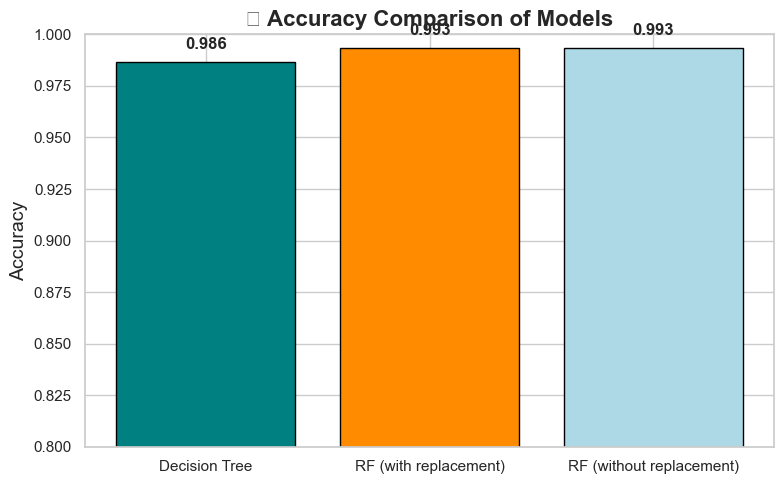

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)
y_pred_dt = dtree.predict(X_test_scaled)
dtree_acc = accuracy_score(y_test, y_pred_dt)

# Train Random Forest (with replacement)
rf_with = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf_with.fit(X_train_scaled, y_train)
y_pred_rf_with = rf_with.predict(X_test_scaled)
rf_with_acc = accuracy_score(y_test, y_pred_rf_with)

# Train Random Forest (without replacement)
rf_without = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_without.fit(X_train_scaled, y_train)
y_pred_rf_without = rf_without.predict(X_test_scaled)
rf_without_acc = accuracy_score(y_test, y_pred_rf_without)

# Print accuracy results
print("🌾 Model Accuracies:")
print(f"✅ Decision Tree Accuracy                : {dtree_acc:.4f}")
print(f"✅ Random Forest (with replacement)      : {rf_with_acc:.4f}")
print(f"✅ Random Forest (without replacement)   : {rf_without_acc:.4f}")

# -------- Plot Accuracy Comparison --------
acc_labels = ['Decision Tree', 'RF (with replacement)', 'RF (without replacement)']
acc_values = [dtree_acc, rf_with_acc, rf_without_acc]

# Create a smaller bar plot
plt.figure(figsize=(8, 5))  # Adjusted to smaller size
sns.set(style='whitegrid')
bars = plt.bar(acc_labels, acc_values, color=['teal', 'darkorange', 'lightblue'], edgecolor='black')

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and labels
plt.title('🌾 Accuracy Comparison of Models', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.8, 1.0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


🌾 Model Accuracies:
✅ Decision Tree Accuracy                : 0.9864
✅ Random Forest (with replacement)      : 0.9932
✅ Random Forest (without replacement)   : 0.9932


C:\Users\91872\AppData\Local\Temp\ipykernel_9064\3947510923.py:76: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  plt.tight_layout()
C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


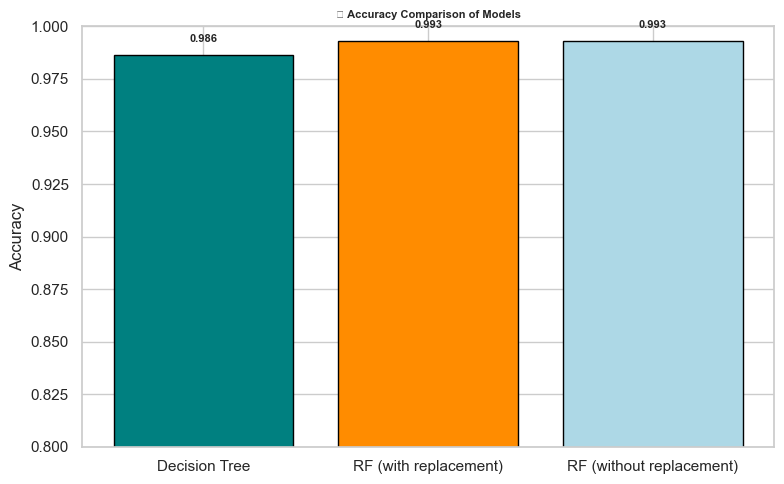

In [8]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("crop_recommendation.csv")

# Features and labels
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)
y_pred_dt = dtree.predict(X_test_scaled)
dtree_acc = accuracy_score(y_test, y_pred_dt)

# Train Random Forest (with replacement)
rf_with = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf_with.fit(X_train_scaled, y_train)
y_pred_rf_with = rf_with.predict(X_test_scaled)
rf_with_acc = accuracy_score(y_test, y_pred_rf_with)

# Train Random Forest (without replacement)
rf_without = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_without.fit(X_train_scaled, y_train)
y_pred_rf_without = rf_without.predict(X_test_scaled)
rf_without_acc = accuracy_score(y_test, y_pred_rf_without)

# Print accuracy results
print("🌾 Model Accuracies:")
print(f"✅ Decision Tree Accuracy                : {dtree_acc:.4f}")
print(f"✅ Random Forest (with replacement)      : {rf_with_acc:.4f}")
print(f"✅ Random Forest (without replacement)   : {rf_without_acc:.4f}")

# -------- Plot Accuracy Comparison --------
acc_labels = ['Decision Tree', 'RF (with replacement)', 'RF (without replacement)']
acc_values = [dtree_acc, rf_with_acc, rf_without_acc]

# Create a smaller bar plot
plt.figure(figsize=(8, 5))  # Adjusted to smaller size
sns.set(style='whitegrid')
bars = plt.bar(acc_labels, acc_values, color=['teal', 'darkorange', 'lightblue'], edgecolor='black')

# Add accuracy values on top of bars with smaller font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Title and labels
plt.title('🌾 Accuracy Comparison of Models', fontsize=8, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1.0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [1]:
import tkinter as tk
from tkinter import font, ttk

# Function to analyze sweat data and predict diabetes
def analyze_data():
    try:
        # Retrieve input values
        age = int(entry_age.get())
        gender = gender_var.get()
        glucose = float(entry_glucose.get())
        sodium = float(entry_sodium.get())
        potassium = float(entry_potassium.get())
        ph = float(entry_ph.get())

        # Example ranges for demonstration purposes
        glucose_range = (70, 100)  # mg/dL
        sodium_range = (135, 145)  # mEq/L
        potassium_range = (3.5, 5.0)  # mEq/L
        ph_range = (4.5, 7.0)  # pH

        # Analysis results
        glucose_status = "Normal" if glucose_range[0] <= glucose <= glucose_range[1] else "Abnormal"
        sodium_status = "Normal" if sodium_range[0] <= sodium <= sodium_range[1] else "Abnormal"
        potassium_status = "Normal" if potassium_range[0] <= potassium <= potassium_range[1] else "Abnormal"
        ph_status = "Normal" if ph_range[0] <= ph <= ph_range[1] else "Abnormal"

        # Diabetes prediction based on glucose and age
        diabetes_prediction = "Risk of Diabetes" if glucose > glucose_range[1] else "Low Risk"
        if age > 45:
            diabetes_prediction = "Higher Risk of Diabetes"

        # Update the results in the GUI
        label_glucose_result.config(text=f"Glucose: {glucose_status}")
        label_sodium_result.config(text=f"Sodium: {sodium_status}")
        label_potassium_result.config(text=f"Potassium: {potassium_status}")
        label_ph_result.config(text=f"pH: {ph_status}")
        label_diabetes_prediction.config(text=f"Diabetes Prediction: {diabetes_prediction}")

    except ValueError:
        label_error.config(text="Please enter valid numerical values.")

# Create the main window
root = tk.Tk()
root.title("Diabetes Prediction Using Sweat Analysis")
root.geometry("500x700")
root.configure(bg='#e0e0e0')  # Light gray background

# Define fonts
classic_font = font.Font(family="Helvetica", size=12, weight="bold")
title_font = font.Font(family="Helvetica", size=16, weight="bold")

# Create and place widgets
tk.Label(root, text="Diabetes Prediction Using Sweat Analysis", font=title_font, bg='#e0e0e0', fg='black').pack(pady=15)

# Create a frame for input fields with a border
input_frame = tk.Frame(root, bg='white', bd=2, relief='solid')
input_frame.pack(pady=10, padx=10)

tk.Label(input_frame, text="Age:", font=classic_font, bg='white', fg='black').grid(row=0, column=0, padx=10, pady=5, sticky='e')
entry_age = tk.Entry(input_frame, font=classic_font)
entry_age.grid(row=0, column=1, padx=10, pady=5)

tk.Label(input_frame, text="Gender:", font=classic_font, bg='white', fg='black').grid(row=1, column=0, padx=10, pady=5, sticky='e')
gender_var = tk.StringVar(value="Male")
gender_frame = tk.Frame(input_frame, bg='white')
tk.Radiobutton(gender_frame, text="Male", variable=gender_var, value="Male", bg='white', fg='black', font=classic_font).pack(side=tk.LEFT, padx=10)
tk.Radiobutton(gender_frame, text="Female", variable=gender_var, value="Female", bg='white', fg='black', font=classic_font).pack(side=tk.LEFT, padx=10)
gender_frame.grid(row=1, column=1, padx=10, pady=5)

tk.Label(input_frame, text="Glucose (mg/dL):", font=classic_font, bg='white', fg='black').grid(row=2, column=0, padx=10, pady=5, sticky='e')
entry_glucose = tk.Entry(input_frame, font=classic_font)
entry_glucose.grid(row=2, column=1, padx=10, pady=5)

tk.Label(input_frame, text="Sodium (mEq/L):", font=classic_font, bg='white', fg='black').grid(row=3, column=0, padx=10, pady=5, sticky='e')
entry_sodium = tk.Entry(input_frame, font=classic_font)
entry_sodium.grid(row=3, column=1, padx=10, pady=5)

tk.Label(input_frame, text="Potassium (mEq/L):", font=classic_font, bg='white', fg='black').grid(row=4, column=0, padx=10, pady=5, sticky='e')
entry_potassium = tk.Entry(input_frame, font=classic_font)
entry_potassium.grid(row=4, column=1, padx=10, pady=5)

tk.Label(input_frame, text="pH:", font=classic_font, bg='white', fg='black').grid(row=5, column=0, padx=10, pady=5, sticky='e')
entry_ph = tk.Entry(input_frame, font=classic_font)
entry_ph.grid(row=5, column=1, padx=10, pady=5)

# Analyze button
tk.Button(root, text="Analyze", command=analyze_data, font=classic_font, bg='white', fg='black').pack(pady=20)

# Create a frame for results with a border
result_frame = tk.Frame(root, bg='white', bd=2, relief='solid')
result_frame.pack(pady=10, padx=10)

tk.Label(result_frame, text="Normal Ranges:", font=classic_font, bg='white', fg='black').pack(pady=5)
tk.Label(result_frame, text="Glucose: 70-100 mg/dL", font=classic_font, bg='white', fg='black').pack(pady=2)
tk.Label(result_frame, text="Sodium: 135-145 mEq/L", font=classic_font, bg='white', fg='black').pack(pady=2)
tk.Label(result_frame, text="Potassium: 3.5-5.0 mEq/L", font=classic_font, bg='white', fg='black').pack(pady=2)
tk.Label(result_frame, text="pH: 4.5-7.0", font=classic_font, bg='white', fg='black').pack(pady=2)

label_glucose_result = tk.Label(result_frame, text="", font=classic_font, bg='white', fg='black')
label_glucose_result.pack(pady=5)

label_sodium_result = tk.Label(result_frame, text="", font=classic_font, bg='white', fg='black')
label_sodium_result.pack(pady=5)

label_potassium_result = tk.Label(result_frame, text="", font=classic_font, bg='white', fg='black')
label_potassium_result.pack(pady=5)

label_ph_result = tk.Label(result_frame, text="", font=classic_font, bg='white', fg='black')
label_ph_result.pack(pady=5)

label_diabetes_prediction = tk.Label(result_frame, text="", font=classic_font, bg='white', fg='black')
label_diabetes_prediction.pack(pady=10)

label_error = tk.Label(root, text="", font=classic_font, bg='#e0e0e0', fg='red')
label_error.pack()

# Run the application
root.mainloop()
